In [ ]:
!pip install pandas
!pip install requests
!pip install beautifulsoup4
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from operator import itemgetter
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def request_url(url):
    data = requests.get(url)
    return data

In [ ]:
def merge_contents(data):
    soup = BeautifulSoup(data.text, "html.parser")
    html_repos = soup.find_all("div", id="bodyContent", class_="vector-body")
    return html_repos

In [ ]:
def tokenize(merge_content):
    s = ''
    for a in merge_content[:]:
        s += a.text + ' '
    arrange = [a for a in s.split()]
    return arrange

In [ ]:
def remove_stop_words(collection):
    stop_words = ["the", "a", "of", "to", "in", "about", "and", "is", "by", "^", "that", "from", "on", "for", "was", "at", "as", "are", "it", "be", "uv","nm)", "an"]
    result = []
    for soz in collection:
        if not soz.isdigit():
            if soz.lower() not in stop_words:
                result.append(soz.lower())
    return result

In [ ]:
def count_frequency(filtered_collection):
    sanash = {element: filtered_collection.count(element) for element in filtered_collection}

    sort = sorted(sanash.items(), key=itemgetter(1), reverse=True)

    tayyor = sort[0:26]
    
    return tayyor

In [ ]:
def viz(frequencies):
    viz = pd.DataFrame.from_dict(frequencies)
    viz = viz.rename(columns={0: 'words', 1: 'count'})
    sns.barplot(y='words', x='count', data=viz)
    sns.set_context('paper')

    crashes = sns.load_dataset('car_crashes').sort_values('total', ascending = False)
    f, ax = plt.subplots(figsize = (6,15))
    sns.set_color_codes('pastel')
    sns.barplot(x = 'count', y = 'words', data = viz, color = 'b', edgecolor = 'w')
    sns.set_color_codes('muted')
    sns.barplot(x = 'count', y = 'words', data = viz, color = 'b', edgecolor = 'w')
    ax.legend(ncol = 2, loc = 'lower right')
    sns.despine(left = True, bottom = True)
    plt.show()
    

No handles with labels found to put in legend.


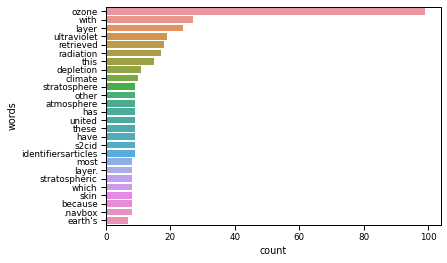

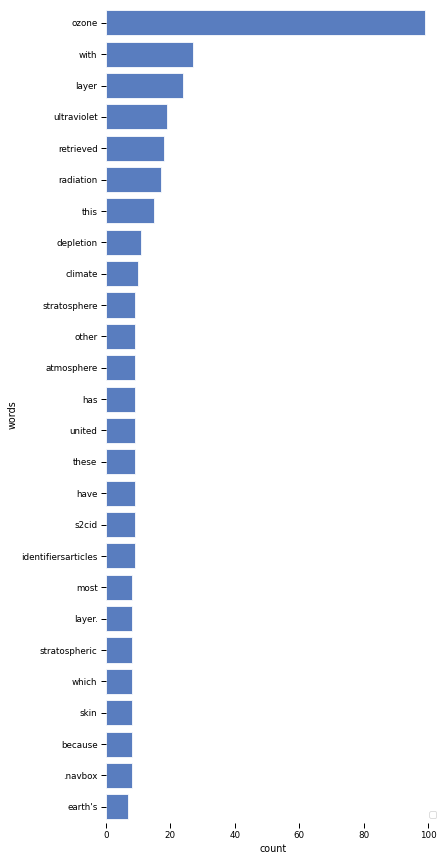

None


In [ ]:
def main():
    url = 'https://en.wikipedia.org/wiki/Ozone_layer'
    data = request_url(url)
    merge_content = merge_contents(data)
    collection = tokenize(merge_content)
    filtered_collection = remove_stop_words(collection)
    frequencies = count_frequency(filtered_collection)
    vizual = viz(frequencies)

    print(vizual)


main()